# Contact Map with Biopython

In [1]:
%matplotlib inline
import Bio.PDB
import numpy
import pylab

In [163]:
def calc_residue_dist(residue_one, residue_two) :
    """Returns the C-alpha distance between two residues"""
    diff_vector  = residue_one["CA"].coord - residue_two["CA"].coord
    return(numpy.sqrt(numpy.sum(diff_vector * diff_vector)))

def calc_dist_matrix(chain_one, chain_two) :
    """Returns a matrix of C-alpha distances between two chains"""
    answer = numpy.zeros((len(chain_one), len(chain_two)), numpy.float)
    for row, residue_one in enumerate(chain_one) :
        for col, residue_two in enumerate(chain_two) :
            answer[row, col] = calc_residue_dist(residue_one, residue_two)
    return(answer)

In [164]:
def plot_dist_matrix(dist_matrix):
    pylab.jet()
    pylab.matshow(numpy.transpose(dist_matrix))
    pylab.xlabel("Residue Index")
    pylab.ylabel("Residue Index")
    pylab.colorbar()
    pylab.show()
    return

In [165]:
def plot_contact_map(contact_map):
    pylab.imshow(numpy.transpose(contact_map), cmap=pylab.get_cmap('binary'))
    pylab.xlabel("Residue Index")
    pylab.ylabel("Residue Index")
    pylab.show()
    return

In [172]:
pdb_code = "1TNF_peptide_1"
pdb_filename = "/home/lmacaya/Escritorio/TNF_Ange/rec/pdbs/1tnf.pdb" 

In [173]:
structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]

In [175]:
dist_matrix = calc_dist_matrix(model["A"], model["B"])
contact_map = dist_matrix < 8.0

In [176]:
print "Minimum distance", numpy.min(dist_matrix)
print "Maximum distance", numpy.max(dist_matrix)

Minimum distance 3.52340841293
Maximum distance 66.0888519287


In [177]:
contact_map

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

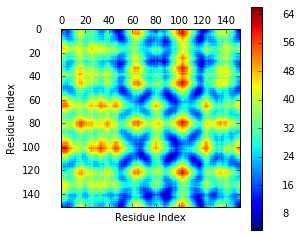

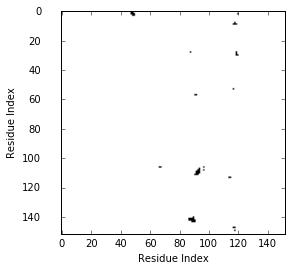

In [178]:
plot_dist_matrix(dist_matrix)
plot_contact_map(contact_map)

# Contact Map with pconpy

In [2]:
run ~/pconpy/pconpy/pconpy.py cmap 8.0 \
-p /home/lmacaya/Escritorio/tnf_ange/docking/CABS_dock/1tnf/peptide_1/CABSdock_42dc26319964bc0/1.pdb \
--chains A,D  \
--output /home/lmacaya/Escritorio/test.png \
--measure CA